# Diabetes Prediction

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/datasets/diabetes.csv')

In [ ]:
# display top five rows in the dataset

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# cheking for null values

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
df.shape  #There are 768 rows and 9 columns in the dataset

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As you see in the overall statistics, the mininum values of
**'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'**
is zero.
It is **not possible** for the levels of 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI'
to naturally or healthily **go to zero** in a living human being.


<Axes: xlabel='Outcome', ylabel='count'>

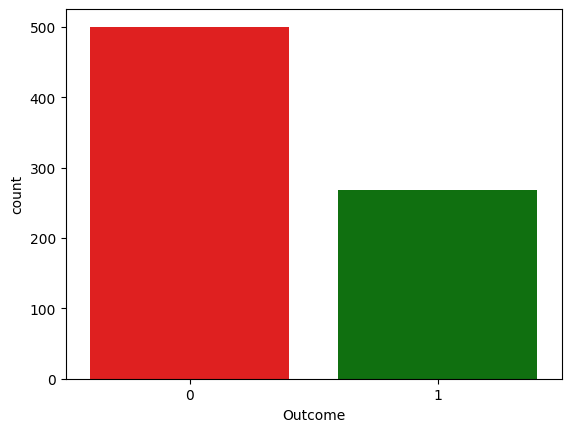

In [34]:
#countplot
sns.countplot(x='Outcome',data=df,palette=['r','g'])

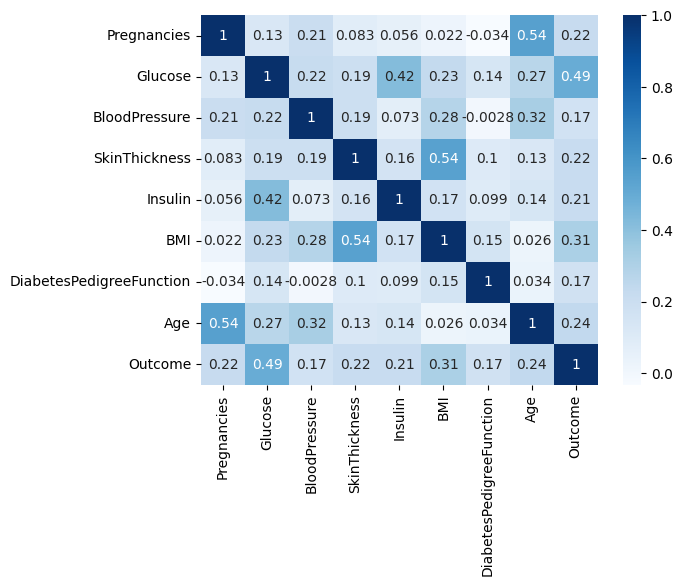

In [35]:
#correlation heatmap
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

## Data Cleaning

In [ ]:
# Replace 0's with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0, np.nan)

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
# Replace null values with the respective column mean
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

## Split the dataset

In [ ]:
# Feature matrix X and the label vector y

X = df.drop(df[['Outcome']], axis=1)
y = df['Outcome']

In [ ]:
# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = tts(X, y, random_state = 30, test_size = 0.20)

## Pipeline Building

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Import classifier algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Create a dictionary of classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [45]:
# Create a list of pipelines, one for each classifier
pipelines = []
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (name, classifier)
    ])
    pipelines.append((name, pipeline))

In [46]:
# Fit and evaluate each classifier in the pipelines
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy - {accuracy:.4f}")

Random Forest: Accuracy - 0.7662
Logistic Regression: Accuracy - 0.7922
Support Vector Classifier: Accuracy - 0.7727
K-Nearest Neighbors: Accuracy - 0.7078
DecisionTreeClassifier: Accuracy - 0.6818


## Model Building

In [ ]:
# Logistic Regression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [ ]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model performance

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7922077922077922


In [37]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[90, 14],
       [18, 32]])

<Axes: >

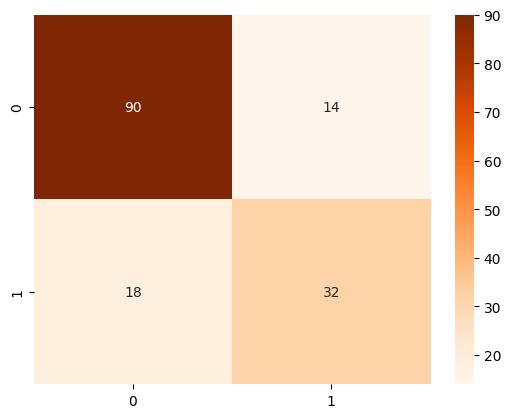

In [42]:
#heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Oranges")

## Prediction on unseen data

In [52]:
new_data = pd.DataFrame({
       'Pregnancies': 5,
       'Glucose' : 100.11,
       'BloodPressure': 90.57,
       'SkinThickness': 35,
       'Insulin': 79.34,
       'BMI':33.6,
       'DiabetesPedigreeFunction': 0.563,
       'Age': 45
       }, index=[0])

In [53]:
clf.predict(new_data)

array([0])